## GRIP-The Spark Foundation

### Data Science & Business analytics Internship

## Task-1:Predict Student Score based on study Hours

### By: Jayashree Biswal

## Problem Statement

#### In the project we need to predict student percentage based no of study hours

### Project Objective
- We need to perform Simple Linear regression and findout percentage based on number of study hours.
- Required to findout predict score if students studies for 9.25 hrs/day?

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Reading data
student = pd.read_csv("./student data.csv")
student.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Data Description

In [3]:
student.shape

(25, 2)

In [4]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Checking for null values

In [6]:
student.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### No null values found in our data set.

### Data Vizualization

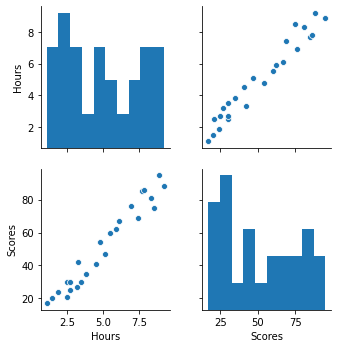

In [7]:
sns.pairplot(student)
plt.show()

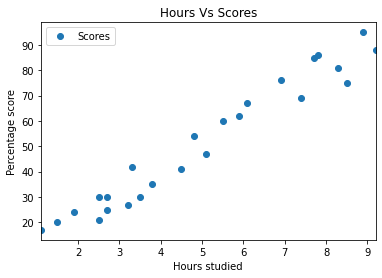

In [8]:
student.plot(x='Hours',y='Scores',style='o')
plt.title('Hours Vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

#### Observation:
    There is a positive linear relation between Studied hours & Percentage score.

### Data Preparation

#### Divide the data into "attributes"(input) & "labels"(output) 

In [9]:
X = student.iloc[:, :-1].values
y = student.iloc[:, 1].values

#### Split data into training & test sets.

In [10]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.70,test_size=0.3,random_state=100)
print(X_train.shape)
print(X_test.shape)

(17, 1)
(8, 1)


#### Heatmap

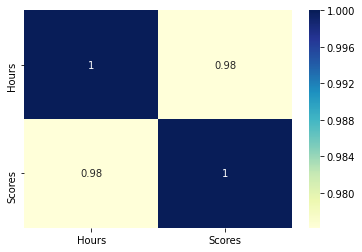

In [11]:
#plotting heatmap to know correlation

sns.heatmap(student.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Training the Algorithm

In [12]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

print("Training Complete")

Training Complete


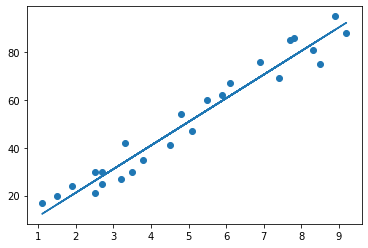

In [13]:
#plotting regression line

line = LR.coef_*X+LR.intercept_

#plotting for test data 
plt.scatter(X,y)
plt.plot(X,line);
plt.show()

### Making Prediction

In [14]:
print(X_test)

#predicting scores
y_pred = LR.predict(X_test)

[[2.7]
 [3.8]
 [3.3]
 [5.9]
 [1.5]
 [7.4]
 [6.9]
 [4.8]]


In [15]:
#Compare Actual vs predicted

df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,25,28.148771
1,35,39.007657
2,42,34.071800
3,62,59.738257
4,20,16.302714
5,69,74.545829
6,76,69.609972
7,54,48.879371


In [21]:
#findout mean absolute error & r2 value

from sklearn import metrics
print("Mean absolute error:" , metrics.mean_absolute_error(y_test,y_pred))
print("R-squared:", metrics.r2_score(y_test,y_pred))

Mean absolute error: 4.762517892332273
R-squared: 0.9309458862687439


In [25]:
#Objective is to find out scores for studied hour 9.25

hours = 9.25
new_pred = LR.predict([[hours]])
print("Number of hours = {}".format(hours))
print("Predicted percentage score = {}".format(new_pred[0]))

Number of hours = 9.25
Predicted percentage score = 92.80850057353504
